In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [2]:
#loading data
data = pd.read_csv("cleaned_tweet.csv")

In [3]:
data.head()

,name,creation_date,content,like_count,quote_count,reply_count,retweet_count
0,adidas,2015-05-30,#Boostyourgame in the new colors of comfort. N...,163,0,5,83
1,adidas,2015-06-05,The greatest player ever is more motivated tha...,257,0,7,132
2,adidas,2015-06-06,Chaos created. 💥 @LuisSuarez9 is the gamechang...,128,0,1,62
3,adidas,2015-06-08,An amazing year comes to a close. We look forw...,431,0,10,259
4,adidas,2015-06-08,Few things are better than being original. One...,381,0,14,231


In [4]:
#exploring dataset
# getting shape of the dataset
data.shape

(6464, 7)

In [5]:
# checking for the number of null values
data.isna().sum()

name             0
creation_date    0
content          0
like_count       0
quote_count      0
reply_count      0
retweet_count    0
dtype: int64

In [6]:
#grouping data by name of the sportswear company
by_company = data.groupby('name').sum()

In [7]:
by_company = by_company.reset_index()

In [8]:
#converting series to Dataframe
by_company = pd.DataFrame(by_company)

In [9]:
by_company

,name,like_count,quote_count,reply_count,retweet_count
0,ASICS America,23594,456,1225,6152
1,ChampionUSA,10171,329,688,2376
2,Converse,227432,7850,6799,59912
3,Nike.com,373955,16334,41138,50993
4,PUMA,43029,314,599,4340
5,Reebok,94661,2358,3280,17896
6,Satisfy,15,1,1,5
7,Under Armour,125811,3430,3809,20028
8,Vans,237729,8805,4492,37207
9,adidas,791839,18737,19824,258694


In [10]:
#sorting values in ascending order by like count
by_company_likes = by_company.sort_values(by = ['like_count'])

Text(0.5, 1.0, 'Number of likes across all tweets in data by company')

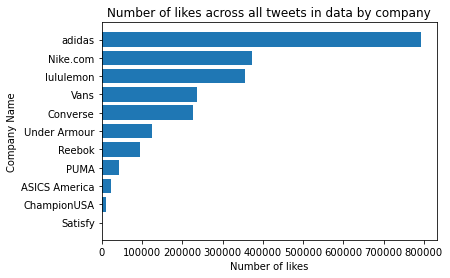

In [11]:
#plotting bar chart for number of likes for each company
plt.barh(by_company_likes.name, by_company_likes.like_count)
plt.xlabel("Number of likes")
plt.ylabel("Company Name")
plt.title("Number of likes across all tweets in data by company")

In [12]:
#sorting values in ascending order by reply count
by_company_reply_count = by_company.sort_values(by = ['reply_count'])

Text(0.5, 1.0, 'Number of replies across all tweets in data by company')

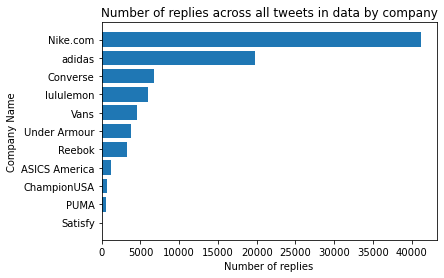

In [13]:
#plotting bar chart for number of replies for each company
plt.barh(by_company_reply_count.name, by_company_reply_count.reply_count)
plt.xlabel("Number of replies")
plt.ylabel("Company Name")
plt.title("Number of replies across all tweets in data by company")

In [14]:
#sorting values in ascending order by retweet count
by_company_retweet_count = by_company.sort_values(by = ['retweet_count'])

Text(0.5, 1.0, 'Number of retweets across all tweets in data by company')

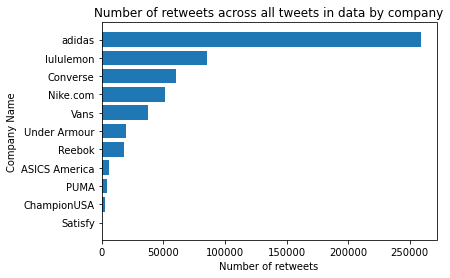

In [15]:
#plotting bar chart for number of retweets for each company
plt.barh(by_company_retweet_count.name, by_company_retweet_count.retweet_count)
plt.xlabel("Number of retweets")
plt.ylabel("Company Name")
plt.title("Number of retweets across all tweets in data by company")

In [16]:
#sorting values in ascending order by quote count
by_company_quote_count = by_company.sort_values(by = ['quote_count'])

Text(0.5, 1.0, 'Number of quotes across all tweets in data by company')

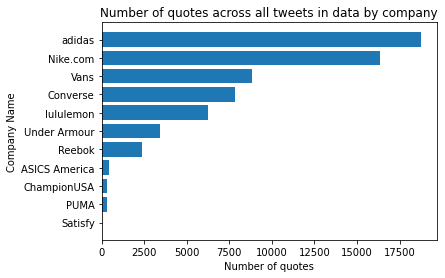

In [17]:
#plotting bar chart for number of quotes for each company
plt.barh(by_company_quote_count.name, by_company_quote_count.quote_count)
plt.xlabel("Number of quotes")
plt.ylabel("Company Name")
plt.title("Number of quotes across all tweets in data by company")

#### Analysis
- It was intresting to observe while adidas has the most number of likes, retweets and quotes across all tweets, Nike has the most number of replies

- As Adidas has the most number of likes, retweets and quotes we wanted to see if the number of tweets in the dataset had any impact on it

In [18]:
# number of tweets by each company
num_tweets_by_company = pd.DataFrame(data.name.value_counts())

In [19]:
#resetting index to proprely name columns
num_tweets_by_company = num_tweets_by_company.reset_index()

In [20]:
#renaming columns and sorting data by number of tweets in ascending order
num_tweets_by_company = num_tweets_by_company.rename(columns = {'index': 'name','name':'numOfTweets'})
num_tweets_by_company = num_tweets_by_company.sort_values(by = ['numOfTweets'])
num_tweets_by_company

,name,numOfTweets
10,Satisfy,5
9,PUMA,62
8,Converse,471
7,ChampionUSA,606
6,adidas,630
5,ASICS America,700
4,Under Armour,706
3,lululemon,792
2,Reebok,820
1,Vans,822


Text(0.5, 1.0, 'Number of tweets by company')

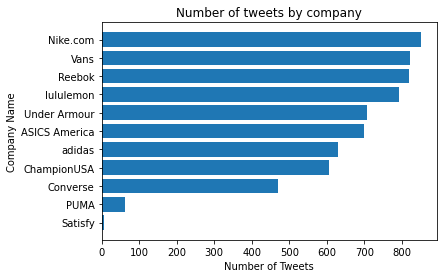

In [21]:
#plotting bar chart for number of tweets for each company
plt.barh(num_tweets_by_company.name, num_tweets_by_company.numOfTweets)
plt.xlabel("Number of Tweets")
plt.ylabel("Company Name")
plt.title("Number of tweets by company")

##### Analysis
- We observed that while Adidas has the most number of likes, retweets and quotes, it did not have the most number of tweets in the dataset, infact Nike, Vans and Reebok had the most number of tweets in the dataset  

Question : Does the number of words in the tweet content have an impact on the number of likes of the tweet?

In [22]:
#initializing array of 0's of length of the data to hold values for the length of each tweet
#going through each tweet's content and calculating its length
#appending length to the array
#adding array as'NumOfWords' to dataset
num_of_words = [0] * len(data)

for i in range(len(data)):
    word = data.content[i].split()
    length = len(word)
    num_of_words[i] = length
data['numOfWords'] = num_of_words

In [23]:
data.head()

,name,creation_date,content,like_count,quote_count,reply_count,retweet_count,numOfWords
0,adidas,2015-05-30,#Boostyourgame in the new colors of comfort. N...,163,0,5,83,15
1,adidas,2015-06-05,The greatest player ever is more motivated tha...,257,0,7,132,18
2,adidas,2015-06-06,Chaos created. 💥 @LuisSuarez9 is the gamechang...,128,0,1,62,11
3,adidas,2015-06-08,An amazing year comes to a close. We look forw...,431,0,10,259,21
4,adidas,2015-06-08,Few things are better than being original. One...,381,0,14,231,19


Text(0.5, 1.0, 'Number of Likes by Number of Words in Tweet')

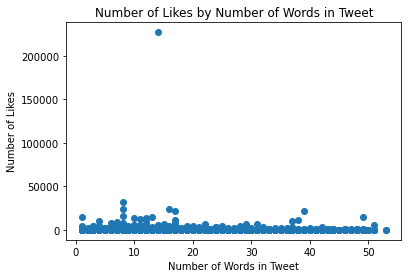

In [24]:
#scatter plot for number of likes and number of words in tweets
plt.scatter(data.numOfWords, data.like_count)
plt.xlabel("Number of Words in Tweet")
plt.ylabel("Number of Likes")
plt.title("Number of Likes by Number of Words in Tweet")

Due to some outliers, it is hard to tell if there is any correlation between the number of words in the tweet and the number of likes. 
So next, we will be looking at only tweets that have less than 4000 likes to see if there is any correlation

In [25]:
#subset of data that contains tweets with less than 4000 likes
likes_under_4000 = data[data.like_count < 4000]

Text(0.5, 1.0, 'Number of Likes by Number of Words in Tweet')

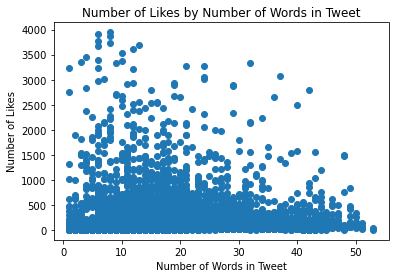

In [28]:
#scatter plot for number of likes and number of words in tweets
plt.scatter(likes_under_4000.numOfWords, likes_under_4000.like_count)
plt.xlabel("Number of Words in Tweet")
plt.ylabel("Number of Likes")
plt.title("Number of Likes by Number of Words in Tweet")


#### Analysis
- While there is not a strong correlation between number of tweets and the number of likes, we observe that for some tweets, tweets with roughly under 15 words look like they have more number of likes

#### Question: What are the most frequently occuring words in 
    - across all the tweets
    - among tweets from top 3 companies with most number of likes
    - top 100 tweets with most likes

In [222]:
#this function takes in text as input and generates a word cloud from it
def wordcloud(text):
    # Create and generate a word cloud image:
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    plt.figure()
    #Display the generated image:
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [223]:
## sorting companies based on the most number of likes
by_company.sort_values(by=['like_count'], ascending= False)

,name,like_count,quote_count,reply_count,retweet_count
9,adidas,791839,18737,19824,258694
3,Nike.com,373955,16334,41138,50993
10,lululemon,354634,6247,5989,85671
8,Vans,237729,8805,4492,37207
2,Converse,227432,7850,6799,59912
7,Under Armour,125811,3430,3809,20028
5,Reebok,94661,2358,3280,17896
4,PUMA,43029,314,599,4340
0,ASICS America,23594,456,1225,6152
1,ChampionUSA,10171,329,688,2376


In [224]:
# joining all the words from every tweet
text_of_tweets = " ".join(word for word in data.content)

#### Wordcloud across all tweets

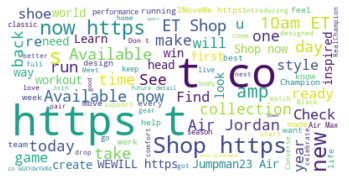

In [225]:
wordcloud(text_of_tweets)

#### Analysis
- Https occured most number of times, which means most tweets had links included
- Other most occuring words include available, shop, Air, shoe, tyle, Jordan 

Next, we will be looking individually at the top 3 companies with most number of likes to see what are the most frequent words in their tweets
- The top 3 companies with most number of likes are Adidas, Nike and Lululemon

#### Wordcloud across all tweets from Adidas

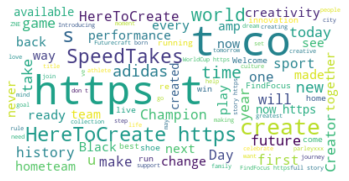

In [226]:
#getting subset of data that contains tweets from adidas
adidas = data[data.name == 'adidas']
# joining all the words from every tweet
text_adidas = " ".join(word for word in adidas.content)
#generating wordcloud
wordcloud(text_adidas)

#### Analysis
- Https occured most number of times in the adiadas data as well
- Other most occuring words incldue SpeedTakes, creativity, HereToCreate , create

#### Wordcloud across all tweets from Nike

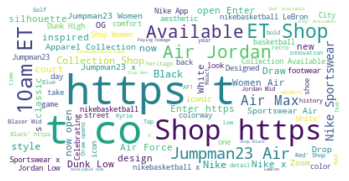

In [227]:
#getting subset of data that contains tweets from Nike
Nike = data[data.name == 'Nike.com']
# joining all the words from every tweet
text_nike = " ".join(word for word in Nike.content)
#generating wordcloud
wordcloud(text_nike)

#### Analysis
- Https occured most number of times in the Nike data as well
- Other most occuring words incldue Shop, Jordan, 10amET, Available

#### Wordcloud across all tweets from Lululemon

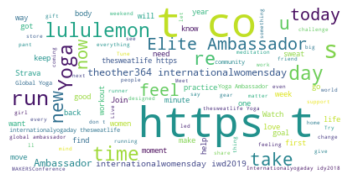

In [228]:
#getting subset of data that contains tweets from lululemon
lululemon = data[data.name == 'lululemon']
# joining all the words from every tweet
text_lulu = " ".join(word for word in lululemon.content)
#generating wordcloud
wordcloud(text_lulu)

#### Analysis
- Https occured most number of times in the Nike data as well
- Other most occuring words incldue Yoga, today, lululemon, run

Next, looking at the top 100 tweets with most likes

#### Wordcloud from top 100 tweets with most likes

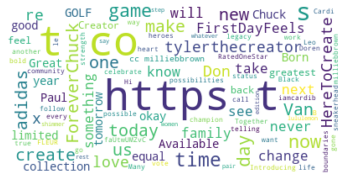

In [190]:
#top 100 tweets with most number of likes 
hundred_most_liked = data.sort_values(by = ['like_count'], ascending = False)[:100]
# joining all the words from every tweet
text_100_most_liked = " ".join(word for word in hundred_most_liked.content)
#generating wordcloud
wordcloud(text_100_most_liked)

#### Analysis
- Https occured most number of times 
- Other most occuring words incldue game, create, new, FirstDayFeels

From the 100 tweets with most number of likes, we wanted to see which companies these tweets came from

Text(0.5, 1.0, 'Number of Likes of the top 10 companies with most likes')

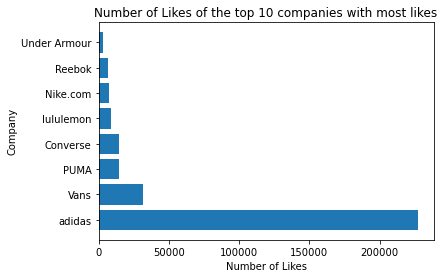

In [192]:
plt.barh(hundred_most_liked.name, hundred_most_liked.like_count)
plt.xlabel("Number of Likes")
plt.ylabel("Company")
plt.title("Number of Likes ")

#### Analysis
- While we observe that adidas has the most number of likes among the data of top 10 companies with most likes, because we observed earlier that a particular tweet from adidas got really high number of likes compared to other tweets, the outlier from adidas could be pulling all the metrics towards adidas 